## Observations and Insights

observation 1: Ramicane and Capomulin are the only two drugs that shrank tumor based on the average and median tumor size over 45 days.

Observation 2: By day 45, the sample population of all but the Ramicane and Capomuli Regimen groups declined significantly. 

Observation 3: Based on the male/female ratio change over time (as illustrated in the pie charts), Some drugs (eg, Ramincane) are more effective in male population, and some (eg, Capomulin) are more effective in female population.

Observation 4: Based on the box plots, both Ramicane and Capomulin are more effective in  shrinking tumor size compared to the other two drugs(Infubinol and Ceftamin). The difference in final tumor size in groups treated with Ramicane and Capomulin is not statistically significant(as illustrated in the box plot).

Observation 5: The tumor volume significantly shrunk in a mouse sample treated with Capomuli.(line chart)

Observation 6: The average tumor volume in the group treated with Capomulin is positively correlated to the weight of the mouse.

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset


merge_table = pd.merge(mouse_metadata,study_results,on="Mouse ID")

drug_names=merge_table["Drug Regimen"].unique()
timepoints=merge_table["Timepoint"].unique()



## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
merge_table.describe()
merge_table_byregimen= merge_table.groupby(["Drug Regimen"])

tumor_volume_mean = merge_table_byregimen["Tumor Volume (mm3)"].mean()
tumor_volume_median = merge_table_byregimen["Tumor Volume (mm3)"].median()
tumor_volume_variance = merge_table_byregimen["Tumor Volume (mm3)"].var()
tumor_volume_std = merge_table_byregimen["Tumor Volume (mm3)"].std()
tumor_volume_sem = merge_table_byregimen["Tumor Volume (mm3)"].sem()
tumor_stats = pd.DataFrame({
    "Mean": tumor_volume_mean,
    "Median": tumor_volume_median,
    "Variance":tumor_volume_variance,
    "Standard Deviation": tumor_volume_std,
    "SEM":tumor_volume_sem
})

tumor_stats.sort_values("Median")


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar plots

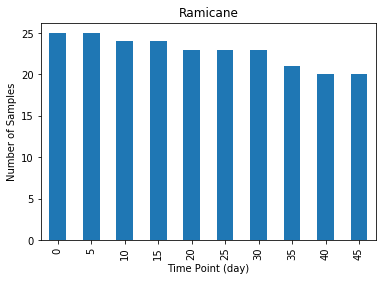

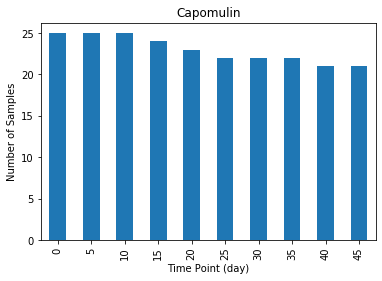

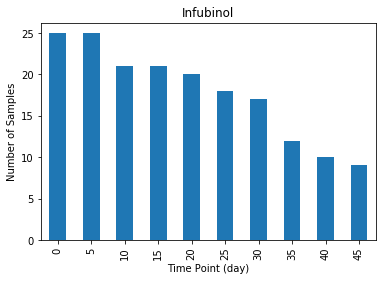

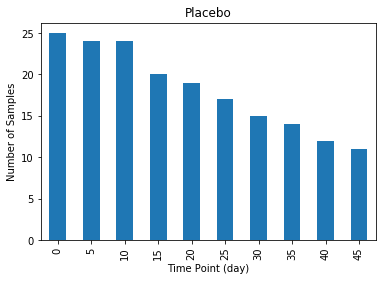

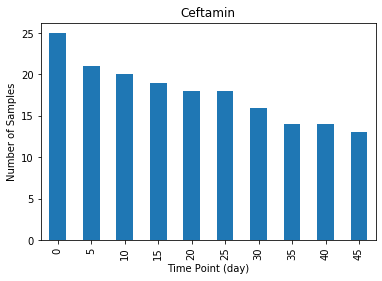

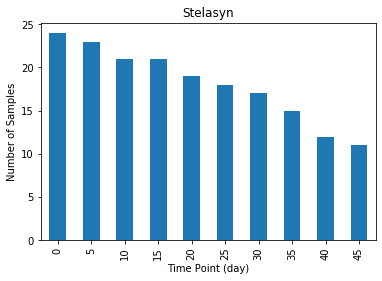

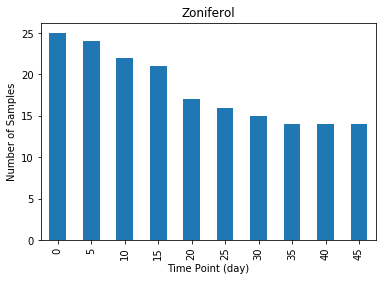

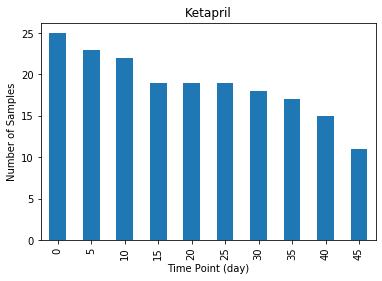

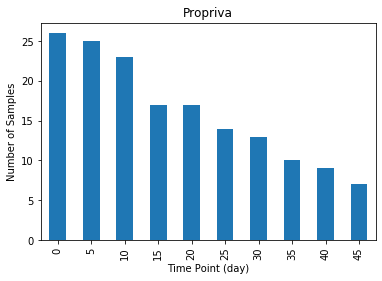

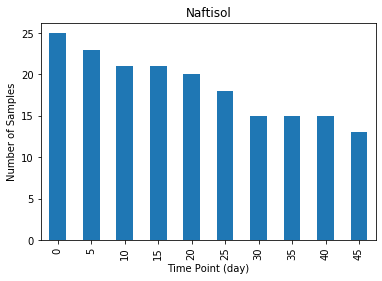

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

merge_table_byregimen_time= merge_table.groupby(["Drug Regimen","Timepoint"])


number_of_samples = pd.DataFrame({
    "Number of Samples": merge_table_byregimen_time.count()["Mouse ID"]
})


for  drug in drug_names:
    drug_number_of_samples=number_of_samples.loc[drug]


    count_chart = drug_number_of_samples.plot(kind='bar',title=drug, width=0.5,legend=False)

    count_chart.set_xlabel("Time Point (day)")
    count_chart.set_ylabel("Number of Samples")
    

    plt.show()




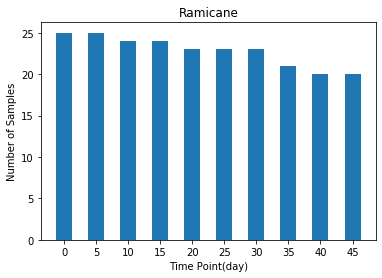

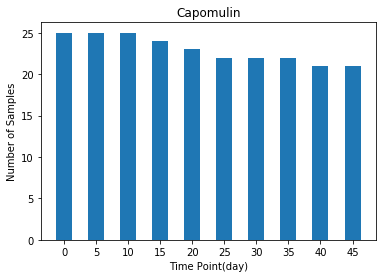

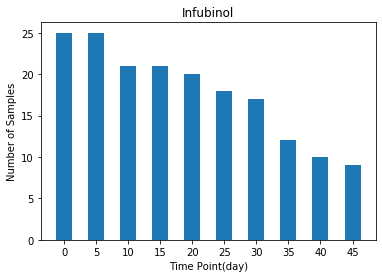

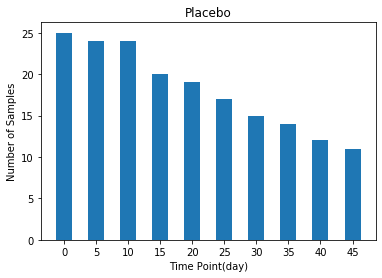

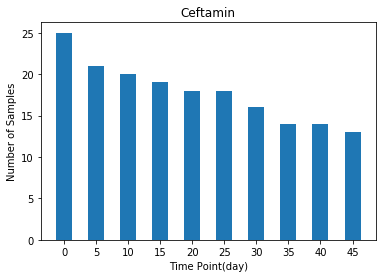

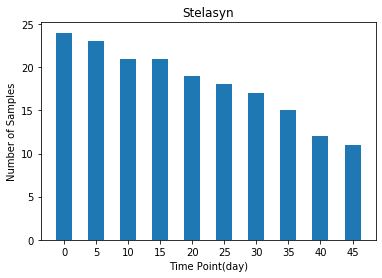

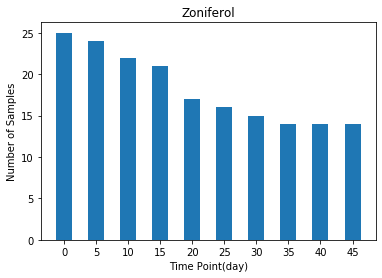

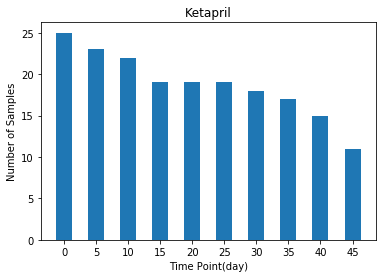

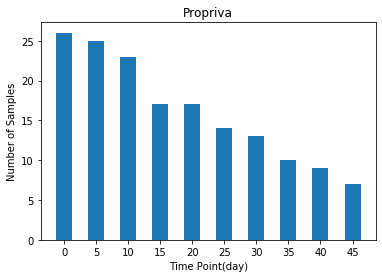

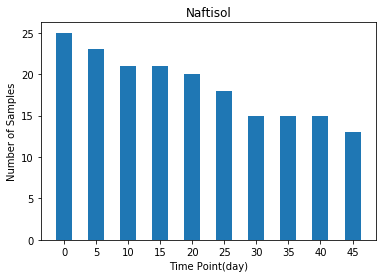

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplonumber
for  drug in drug_names:
    drug_number_of_samples=number_of_samples.loc[drug]
    
    y=drug_number_of_samples["Number of Samples"]
    x_axis = np.arange(len(y))
    drug_number_of_samples.head(50)
    x=drug_number_of_samples.index.tolist()

    plt.bar(x_axis, y,width=0.5)
    tick_locations = [value for value in x_axis]
    plt.xticks(tick_locations, x)
    tick_locations
    plt.title(drug)
    plt.xlabel("Time Point(day)")
    plt.ylabel("Number of Samples")

    plt.show()


## Pie plots

/Users/ningningdu/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


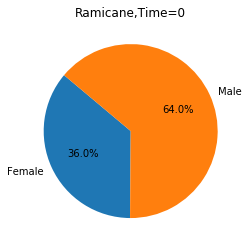

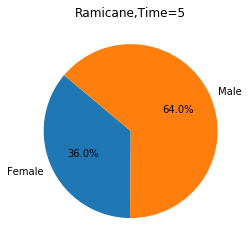

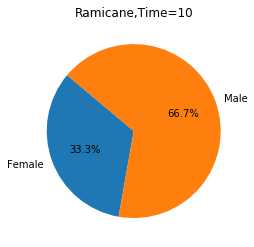

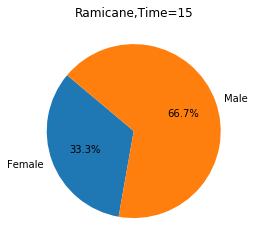

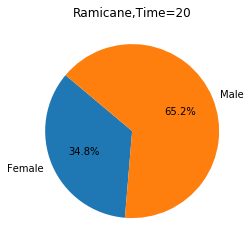

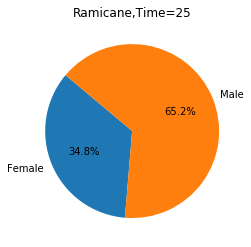

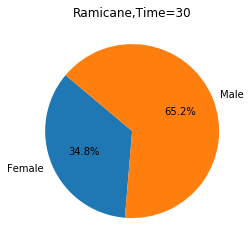

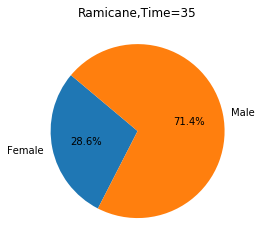

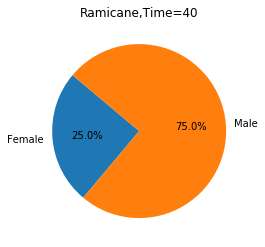

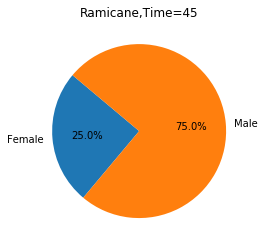

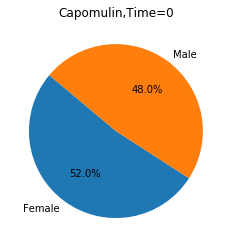

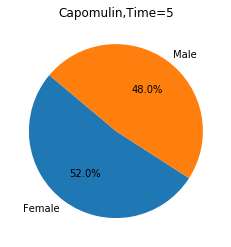

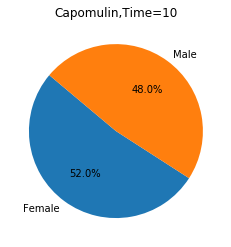

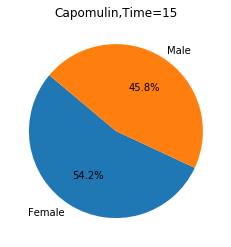

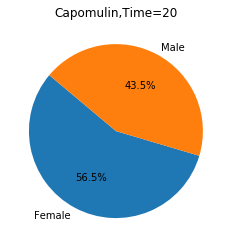

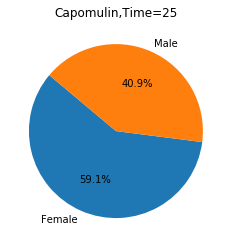

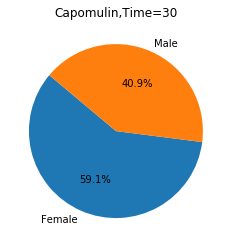

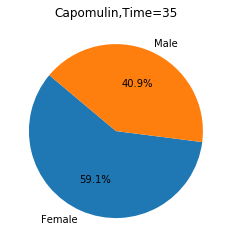

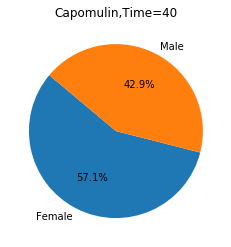

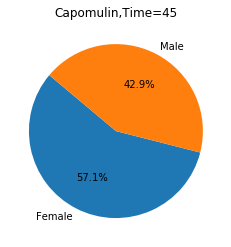

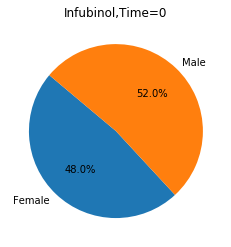

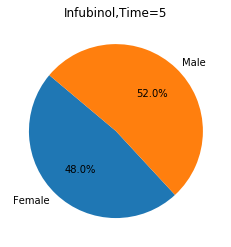

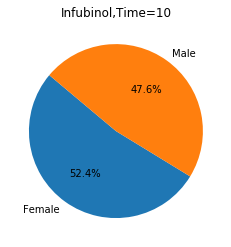

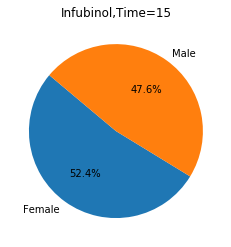

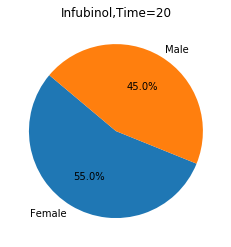

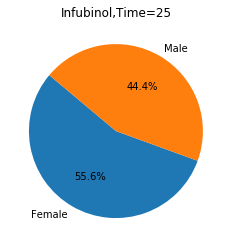

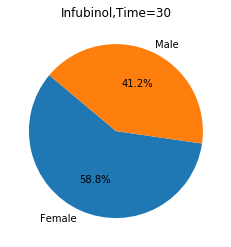

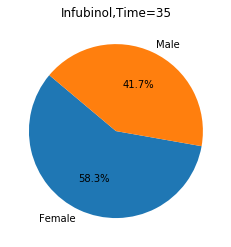

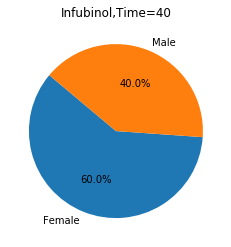

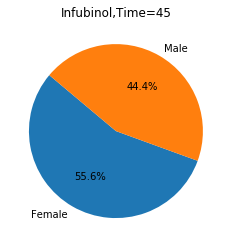

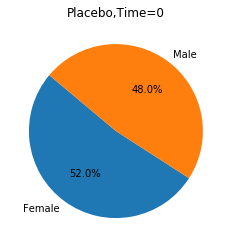

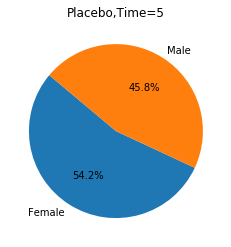

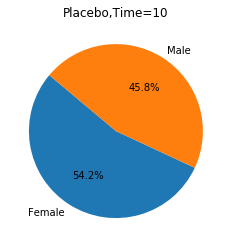

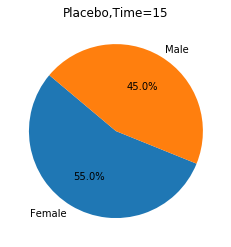

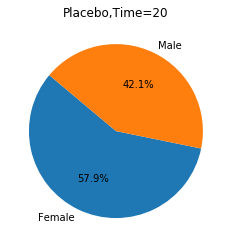

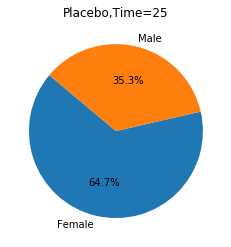

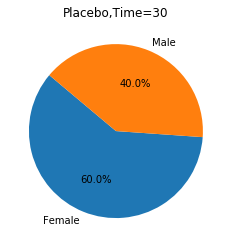

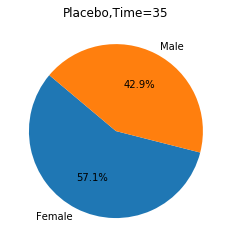

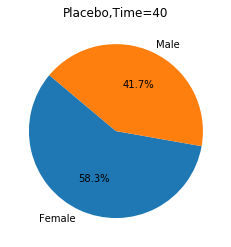

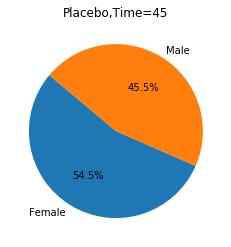

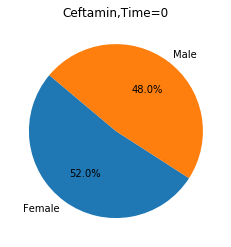

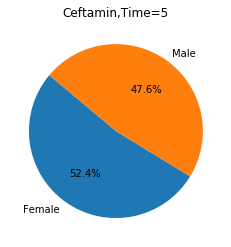

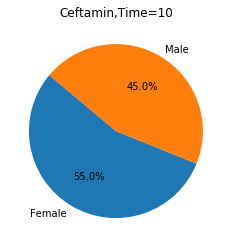

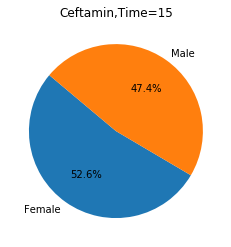

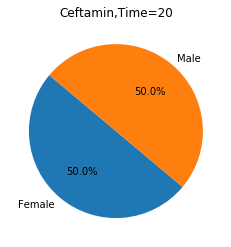

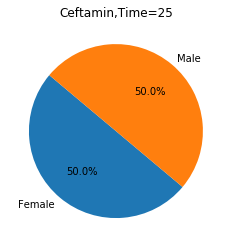

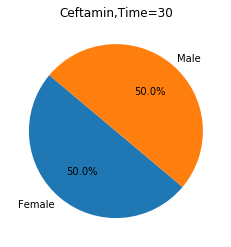

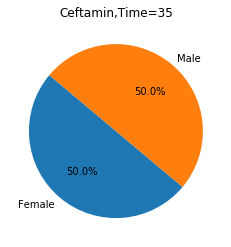

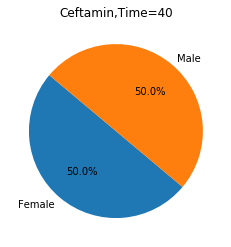

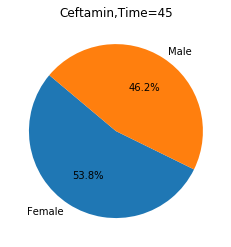

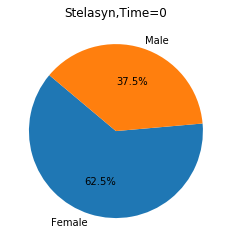

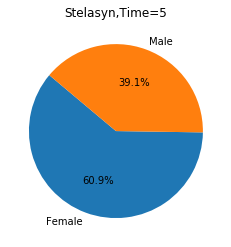

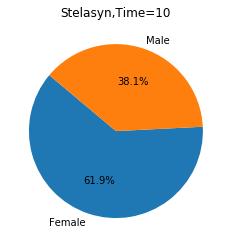

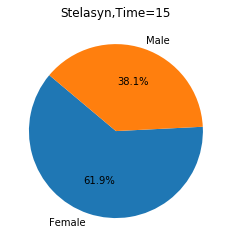

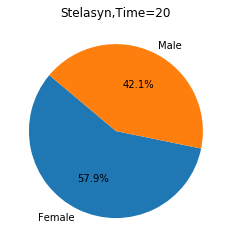

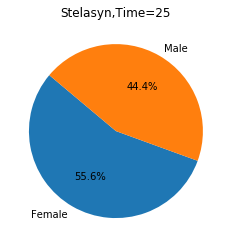

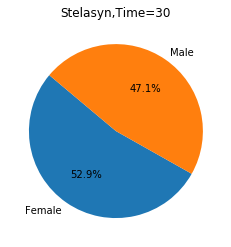

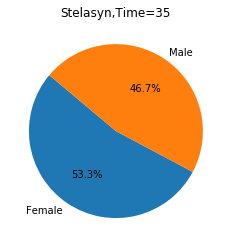

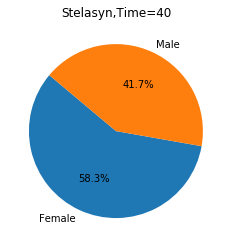

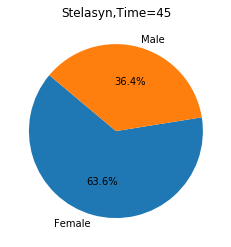

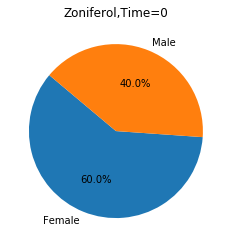

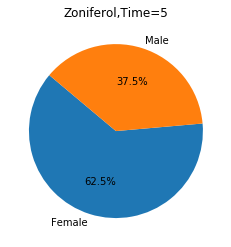

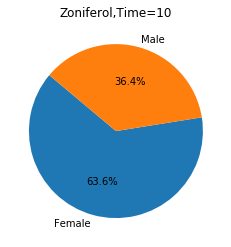

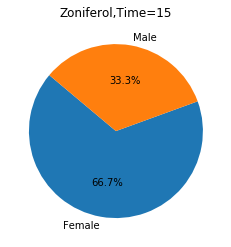

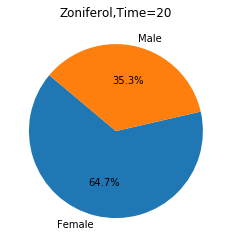

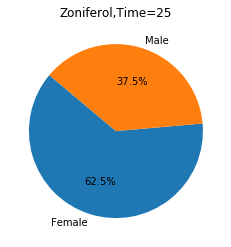

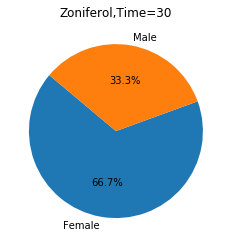

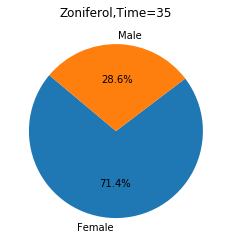

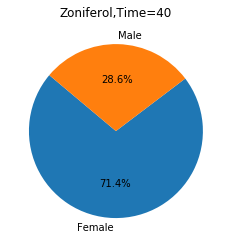

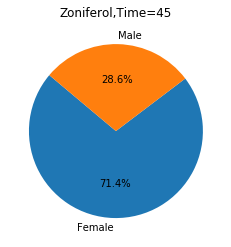

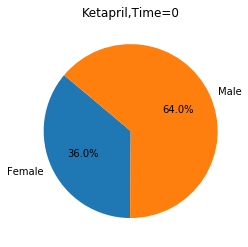

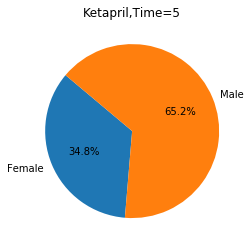

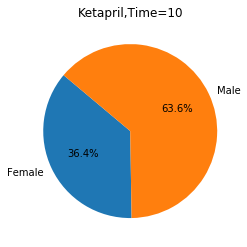

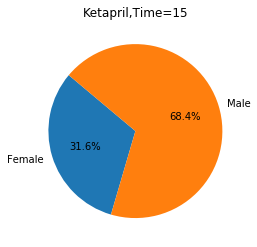

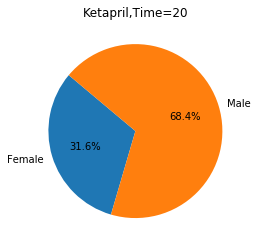

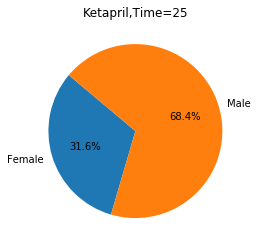

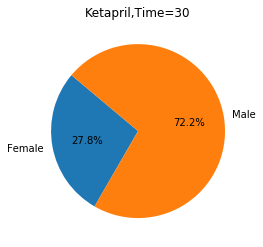

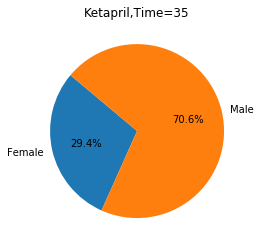

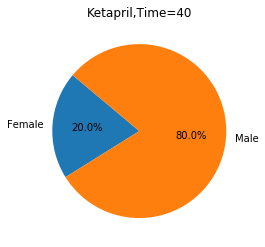

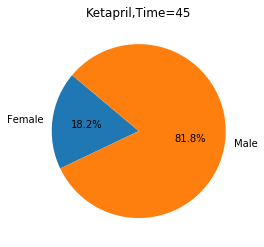

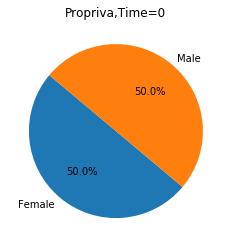

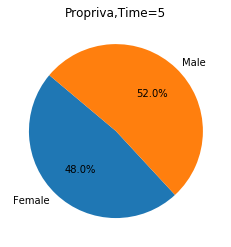

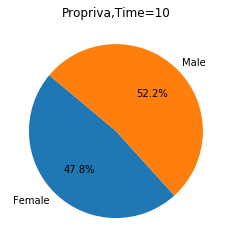

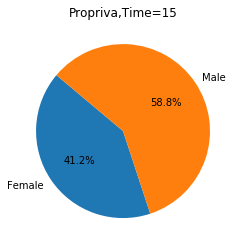

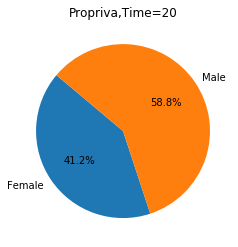

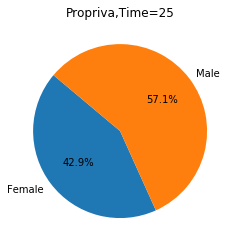

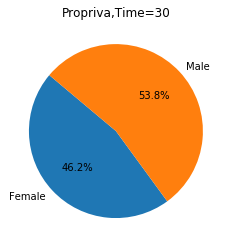

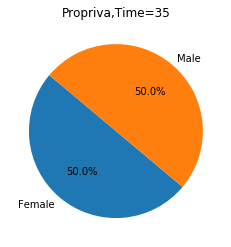

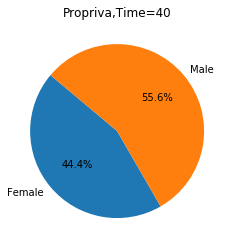

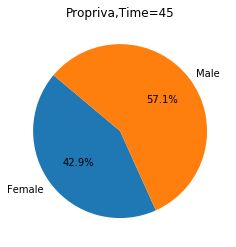

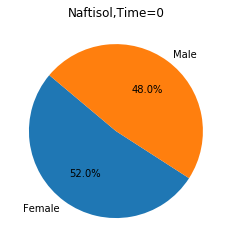

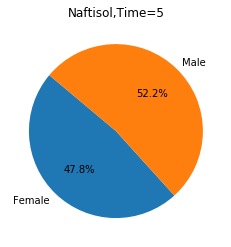

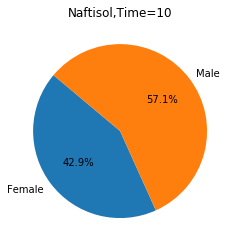

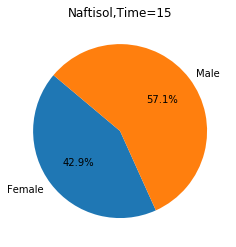

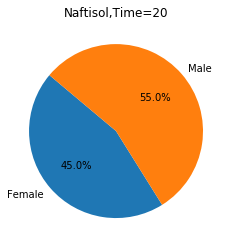

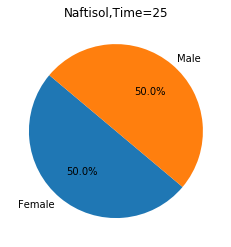

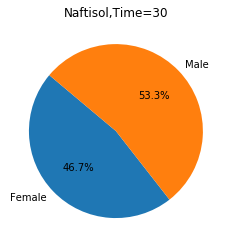

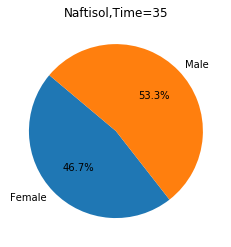

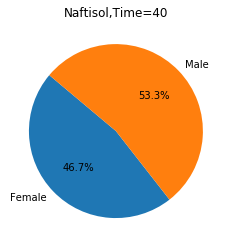

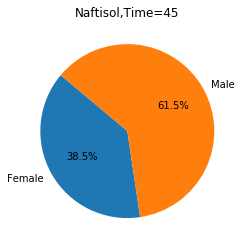

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
merge_table_bysex=merge_table.groupby(["Drug Regimen","Timepoint","Sex"])

for drug in drug_names:
    for time in timepoints:
        sex_count=merge_table_bysex.count().loc[drug].loc[time]
        
        sex_count_df=pd.DataFrame({
            "Sex Count":sex_count["Mouse ID"]
        })
        
        ax=sex_count_df.plot(kind="pie", y= "Sex Count", title=f"{drug},Time={time}",startangle=140,autopct="%1.1f%%",legend=False)
        ax.set_ylabel("")


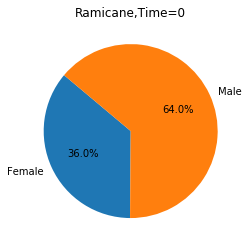

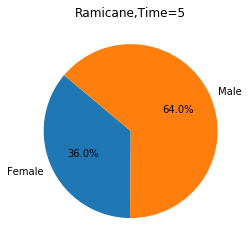

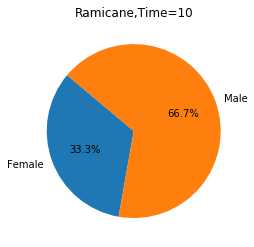

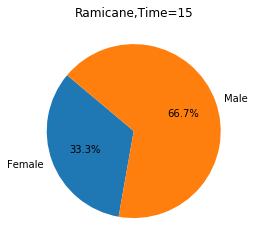

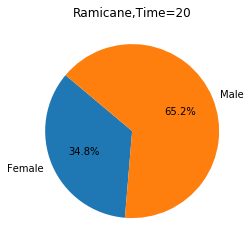

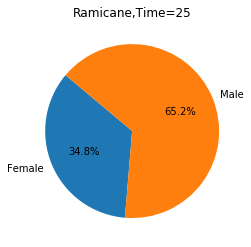

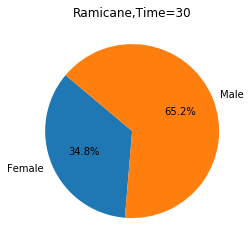

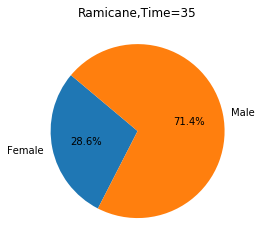

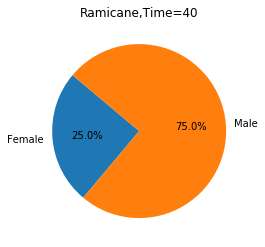

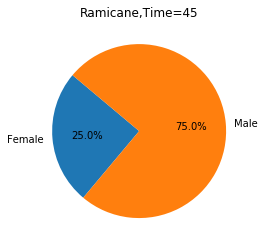

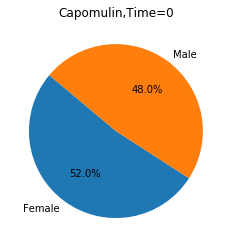

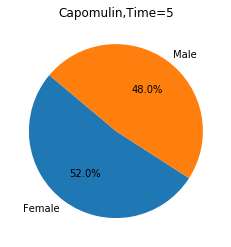

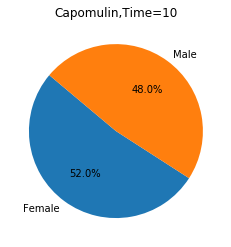

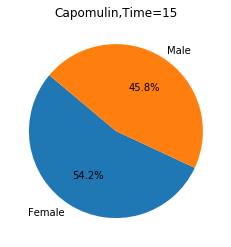

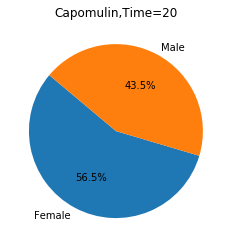

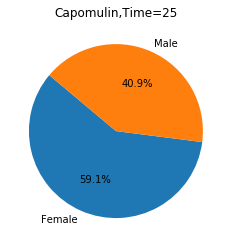

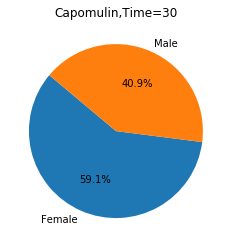

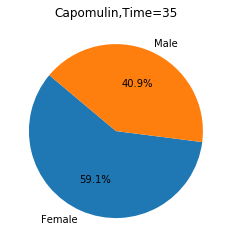

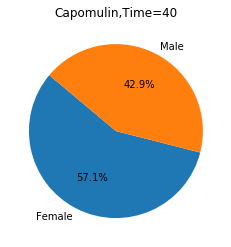

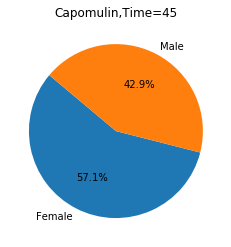

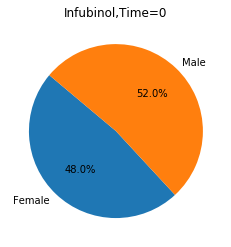

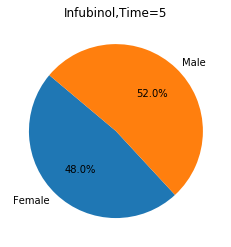

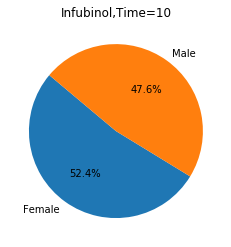

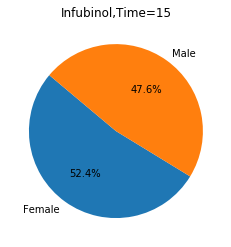

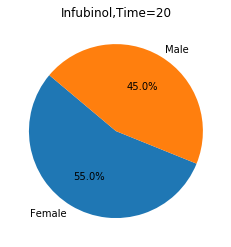

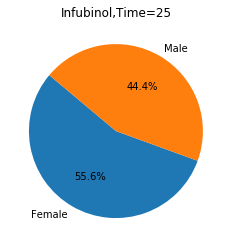

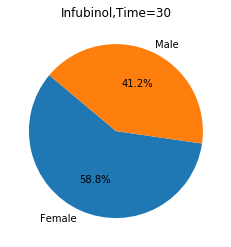

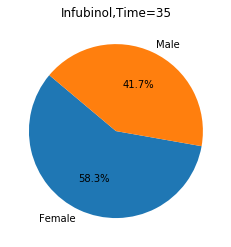

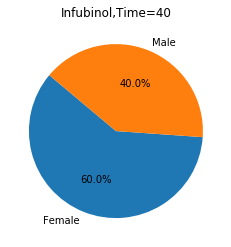

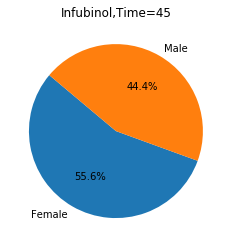

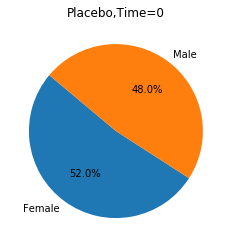

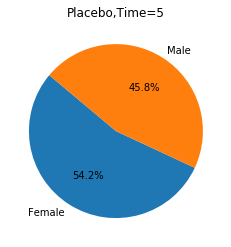

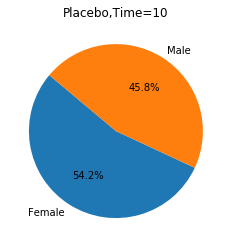

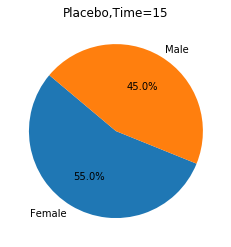

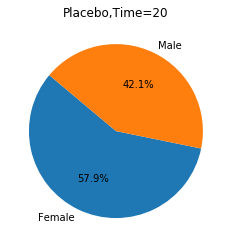

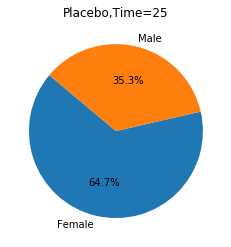

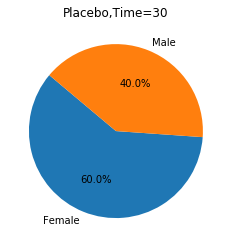

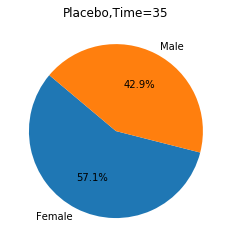

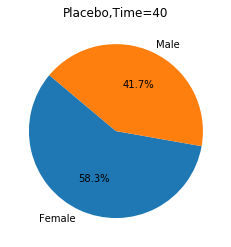

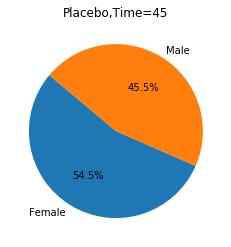

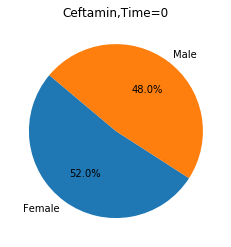

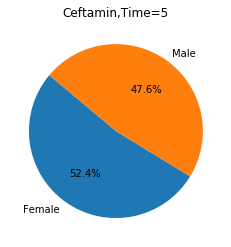

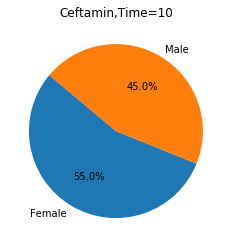

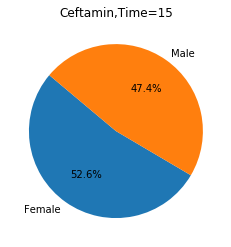

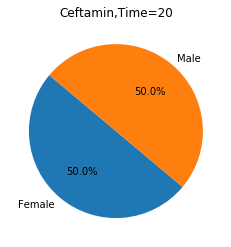

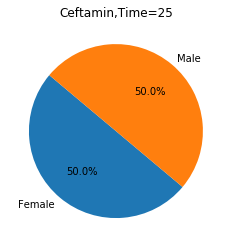

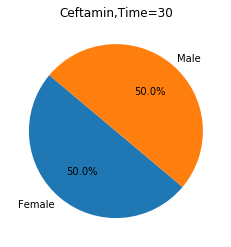

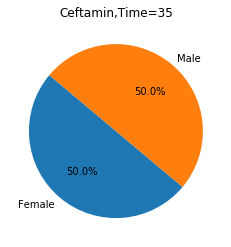

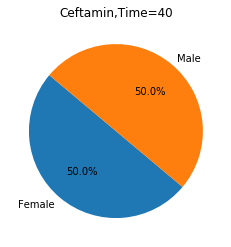

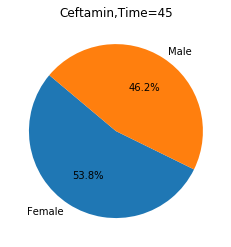

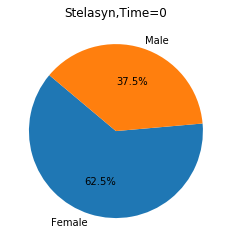

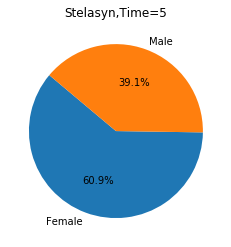

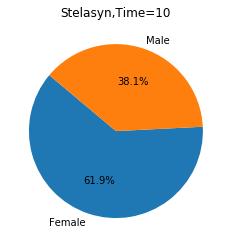

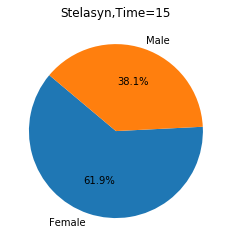

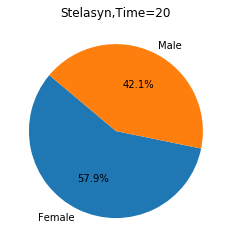

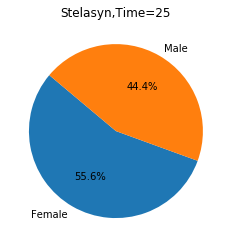

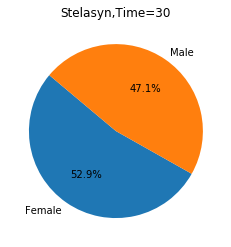

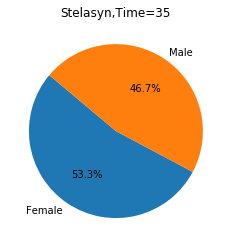

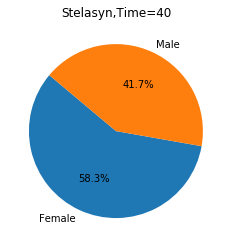

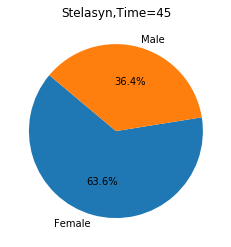

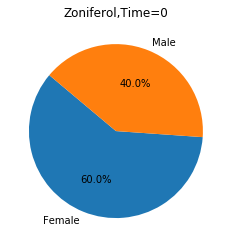

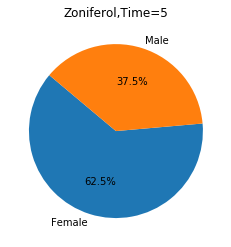

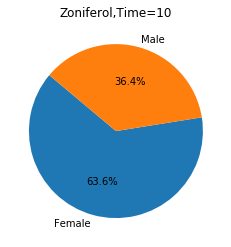

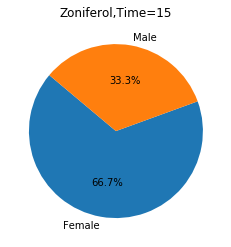

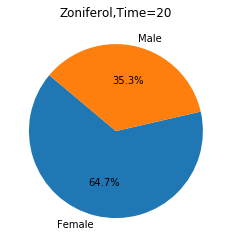

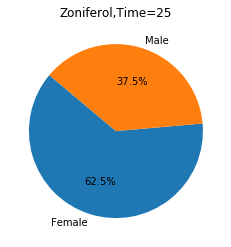

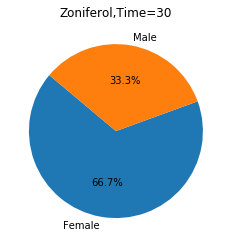

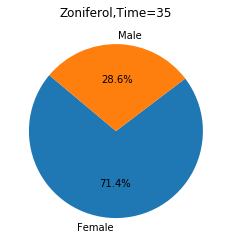

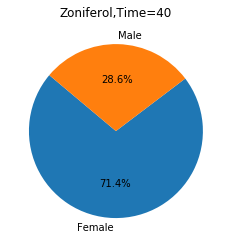

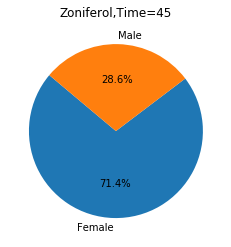

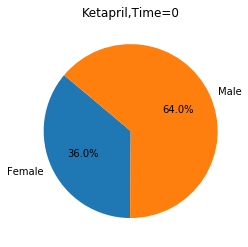

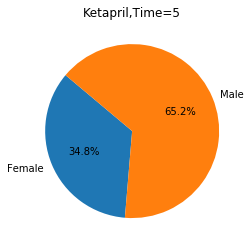

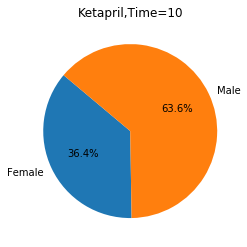

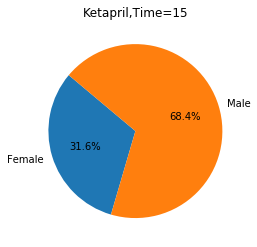

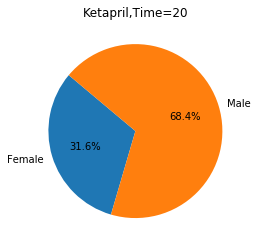

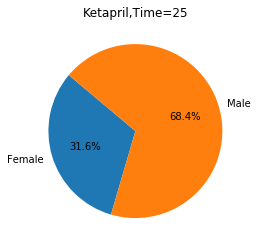

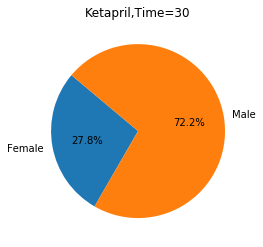

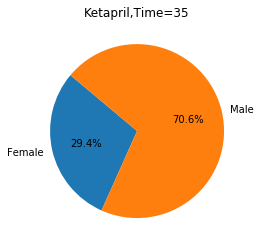

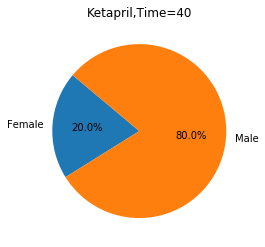

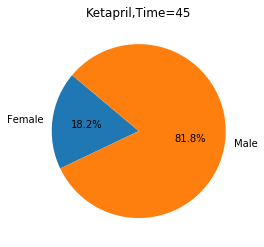

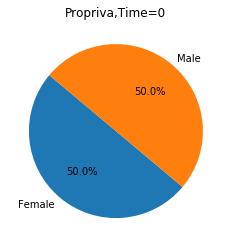

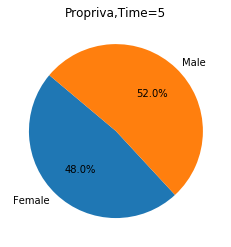

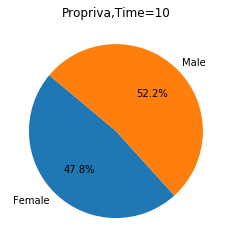

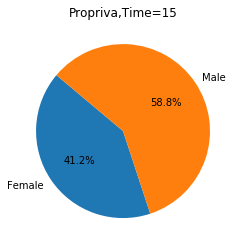

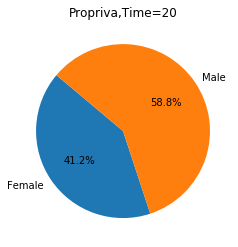

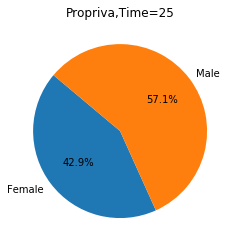

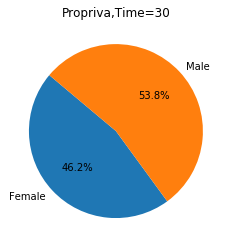

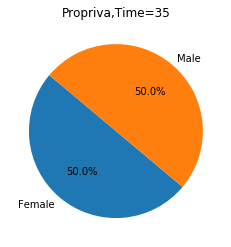

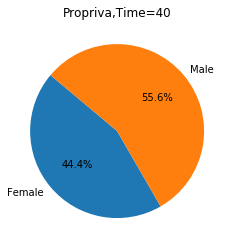

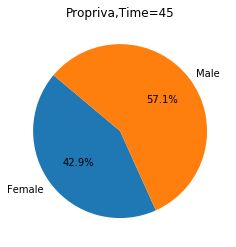

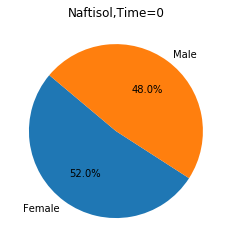

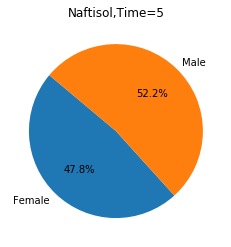

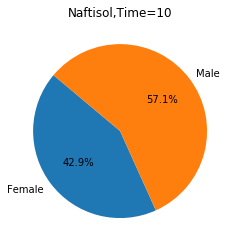

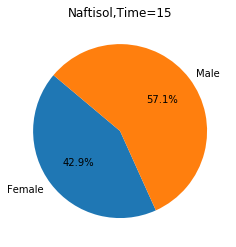

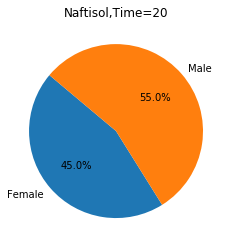

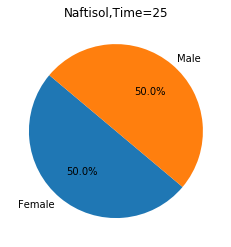

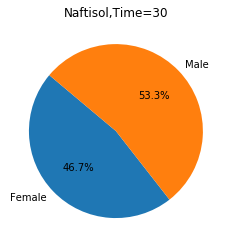

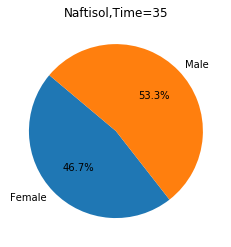

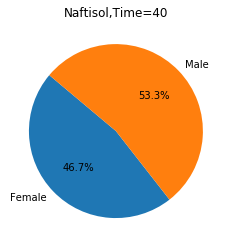

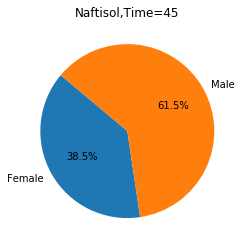

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
for drug in drug_names:
    for time in timepoints:
        sex_count=merge_table_bysex.count().loc[drug].loc[time]
        #print(sex_count)
        sex_count_1=sex_count["Mouse ID"].tolist()
        labels=sex_count.index.tolist()
       
        plt.pie(sex_count_1, labels=labels, autopct="%1.1f%%", shadow=False, startangle=140)
        plt.title(f"{drug},Time={time}")
        plt.show()
        
 


## Quartiles, outliers and boxplots

No outliers found in Capomulin group. 
No outliers found in Ramicane group. 
No outliers found in Infubinol group. 
No outliers found in Ceftamin group. 


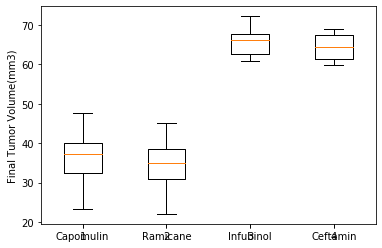

In [6]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
x=0

final_tumor_volume_list=[1,2,3,4]

drug_names_top4=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
for drug in drug_names_top4:
    
    final_tumor_volume_df = merge_table.loc[(merge_table["Drug Regimen"]==drug)&(merge_table["Timepoint"]==45)]
    final_tumor_volume = final_tumor_volume_df["Tumor Volume (mm3)"]
    final_tumor_volume_list[x]=final_tumor_volume
    quartiles=final_tumor_volume.quantile([0.25,0.5,0.75])
    iqr=quartiles[0.75]-quartiles[0.25]
    lower_limit=quartiles[0.25]-1.5*iqr
    upper_limit=quartiles[0.75]+1.5*iqr
    outliers = final_tumor_volume_df.loc[(final_tumor_volume_df['Tumor Volume (mm3)'] < lower_limit) | (final_tumor_volume_df['Tumor Volume (mm3)'] > upper_limit)]
    if len(outliers["Mouse ID"])==0:
        print(f"No outliers found in {drug} group. ")
    else:
        print(outliers)
    x=x+1
    
fig1, ax1 = plt.subplots()

ax1.set_ylabel('Final Tumor Volume(mm3)')
plt.xticks([1, 2, 3,4], drug_names_top4)

ax1.boxplot(final_tumor_volume_list)

plt.show()

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and scatter plots

Text(0.5, 1.0, 'Tumor size vs. time for Mouse s185 treated with Capomulin')

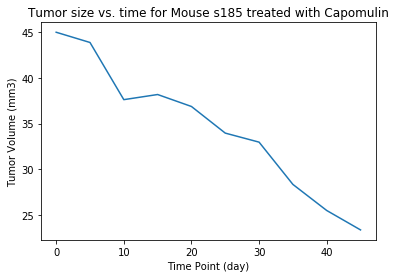

In [7]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_df=merge_table.loc[(merge_table["Drug Regimen"]=="Capomulin")&(merge_table["Mouse ID"]=="s185")]
Capomulin_df.head(50)
x= Capomulin_df["Timepoint"]
y=Capomulin_df["Tumor Volume (mm3)"]
plt.plot(x,y)
plt.xlabel("Time Point (day)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor size vs. time for Mouse s185 treated with Capomulin")



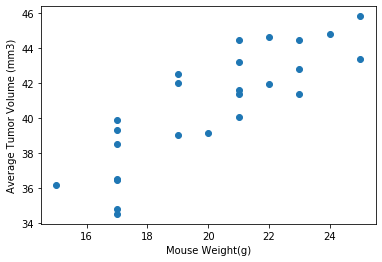

In [8]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
merge_table.head(60)
Capomulin_df_1=merge_table.loc[(merge_table["Drug Regimen"]=="Capomulin")].groupby(["Mouse ID"])
avg_tumor_volume_byID=Capomulin_df_1["Tumor Volume (mm3)"].mean()
weight=Capomulin_df_1["Weight (g)"].mean()
avg_tumor_volume_byID
weight

plt.scatter(weight, avg_tumor_volume_byID)
plt.xlabel("Mouse Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

The correlation between both factors is 0.84
y = 0.95x + 21.55


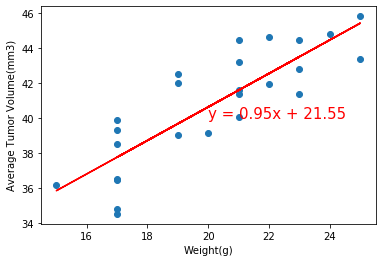

In [9]:
correlation = st.pearsonr(weight,avg_tumor_volume_byID)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_tumor_volume_byID)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(weight,avg_tumor_volume_byID)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume(mm3)')
plt.show()